In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data_train=pd.read_csv('ds1_train.csv')
X_train= data_train.iloc[:, :2]
y_train= data_train.iloc[:, 2:]

In [45]:
np.random.seed(2)
mu_0= np.array(X_train.iloc[np.random.randint(0, X_train.shape[0])])
np.random.seed(3)
mu_1= np.array(X_train.iloc[(np.random.randint(0, X_train.shape[0]))])
np.random.seed(4)
mu_2= np.array(X_train.iloc[(np.random.randint(0, X_train.shape[0]))])
np.random.seed(5)
mu_3= np.array(X_train.iloc[(np.random.randint(0, X_train.shape[0]))])

In [46]:
print(f'The initial values of the cluster centroids: µ0= {mu_1}, µ1= {mu_2}, µ2= {mu_3} and µ3= {mu_4} ')

The initial values of the cluster centroids: µ0= [ 2.81179839 20.87811303], µ1= [  3.6693935  163.66112947], µ2= [ 1.70818936 52.4371375 ] and µ3= [ 1.70818936 52.4371375 ] 


In [47]:
X_train= np.array(X_train)
y_train= np.array(y_train)

In [48]:
centroids=[mu_0, mu_1, mu_2, mu_3]
K=4                                  #no. of centroids

In [49]:
def clusters(X, centroids):
    idx=[]
    for i in range(X.shape[0]):
        dist_i=[]
        for j in range(len(centroids)):
            dist= np.linalg.norm(X[i]- centroids[j], ord=2)
            dist_i.append(dist)
        
        idx.append(np.argmin(dist_i))
        
    return idx            

In [51]:
idx_n=clusters(X_train, centroids)
print(idx_n)

[3, 2, 2, 1, 3, 3, 2, 0, 0, 3, 3, 2, 3, 3, 1, 3, 3, 2, 3, 0, 2, 1, 0, 2, 0, 3, 0, 2, 2, 3, 0, 2, 1, 3, 2, 3, 1, 0, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 1, 2, 0, 0, 3, 0, 0, 0, 2, 2, 1, 3, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 0, 1, 0, 2, 0, 1, 3, 2, 0, 2, 2, 1, 3, 2, 3, 0, 2, 3, 3, 2, 2, 2, 0, 3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2, 2, 3, 3, 0, 3, 3, 2, 3, 0, 3, 2, 0, 2, 0, 1, 3, 0, 0, 2, 2, 3, 2, 3, 0, 2, 2, 3, 1, 2, 2, 2, 2, 3, 3, 1, 1, 3, 2, 1, 1, 0, 2, 3, 3, 2, 0, 3, 3, 2, 3, 2, 3, 0, 2, 2, 3, 3, 2, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 2, 2, 2, 3, 2, 2, 0, 0, 3, 2, 2, 1, 3, 3, 2, 2, 1, 2, 0, 0, 3, 2, 1, 3, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 3, 2, 3, 0, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 0, 2, 1, 3, 3, 2, 2, 0, 0, 2, 1, 3, 2, 3, 2, 3, 2, 2, 3, 1, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 0, 3, 1, 0, 0, 1, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 1, 0, 2, 

In [52]:
def update_centroids(X, centroids, idx):
    for k in range(len(centroids)):
        X_k=[]
        for i in range(len(X)):
            if(idx[i]==k):
                X_k.append(X[i])
        centroids[k]= np.mean(X_k, axis=0)
    return centroids

In [53]:
def cost(X, idx, centroids):
    cost=0
    m=len(X)
    for k in range(len(centroids)):
        for i in range(len(X)):
            if(idx[i]==k):
                cost+=((np.linalg.norm(X[i]- centroids[k], ord=2)**2))
    cost=(cost/m)
    return cost

In [54]:
print(update_centroids(X_train, centroids, idx_n))

[array([ 3.27606879, 29.08148296]), array([ 2.97776895, 13.56905547]), array([  3.92405874, 223.96127882]), array([ 3.60960506, 66.8440357 ])]


In [58]:
epochs=50
centroids=[0, 0, 0, 0]
centroid_history=[]
cost_history=[]
for i in range(100):
    centroids[0]= np.array(X_train[np.random.randint(0, X_train.shape[0])])
    centroids[1]= np.array(X_train[(np.random.randint(0, X_train.shape[0]))])
    centroids[2]= np.array(X_train[(np.random.randint(0, X_train.shape[0]))])
    centroids[3]= np.array(X_train[(np.random.randint(0, X_train.shape[0]))])
    
    for j in range(epochs):
        idx= clusters(X_train, centroids)
        centroids= update_centroids(X_train, centroids, idx)
        cost_j= cost(X_train, idx, centroids)
        centroid_history.append(centroids)
        cost_history.append(cost_j)


        

In [59]:
print(idx)

[3, 1, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 2, 3, 0, 3, 1, 1, 3, 3, 0, 3, 3, 0, 0, 3, 3, 0, 0, 0, 2, 1, 1, 1, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 1, 3, 0, 0, 3, 3, 3, 3, 1, 0, 0, 0, 0, 3, 3, 1, 3, 0, 3, 0, 3, 3, 0, 1, 1, 3, 3, 1, 0, 3, 1, 0, 3, 1, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 1, 3, 0, 1, 3, 3, 1, 3, 3, 0, 3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 3, 3, 1, 3, 1, 0, 3, 0, 0, 2, 0, 3, 1, 0, 0, 1, 3, 3, 3, 3, 0, 0, 3, 3, 3, 1, 3, 2, 3, 3, 0, 3, 3, 0, 1, 3, 1, 0, 3, 0, 1, 0, 3, 0, 0, 0, 0, 3, 0, 3, 3, 0, 1, 3, 3, 3, 1, 3, 3, 0, 3, 0, 0, 1, 3, 1, 3, 3, 1, 1, 3, 3, 0, 3, 1, 0, 3, 0, 0, 3, 3, 1, 1, 2, 0, 3, 0, 0, 1, 0, 3, 1, 1, 3, 3, 0, 1, 0, 3, 3, 0, 1, 1, 3, 0, 3, 3, 3, 0, 3, 0, 0, 1, 0, 3, 0, 2, 3, 1, 0, 2, 0, 0, 0, 3, 3, 2, 0, 3, 3, 1, 0, 0, 3, 1, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 3, 1, 3, 3, 0, 0, 1, 3, 2, 0, 3, 3, 1, 0, 1, 3, 0, 3, 3, 0, 3, 0, 1, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 1, 2, 3, 3, 1, 0, 1, 3, 1, 0, 2, 3, 0, 0, 0, 2, 3, 1, 3, 3, 3, 0, 

In [14]:
print(np.array(y_train))

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

In [62]:
centroids=np.array(centroids)
print(centroids)

[[  3.70140075 122.76473282]
 [  4.11055084 266.45713301]
 [  4.8018495  652.72916513]
 [  3.30417483  35.15171649]]


In [61]:
count_1=[]
count_0=[]
for i in range(len(y_train)):
    if(y_train[i]==1):
        count_1.append(X_train[i])
    else:
        count_0.append(X_train[i])
        
print(np.mean(count_1, axis=0))
print(np.mean(count_0, axis=0))

[ 4.056795  55.8436525]
[  2.97485551 129.65282584]


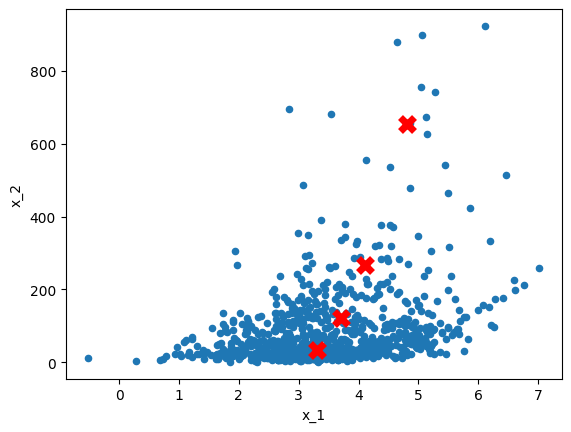

In [71]:
y_points=np.array(centroids[0,1], centroids[1,1])
data_train.plot(kind="scatter", x="x_1", y= "x_2")
plt.plot(centroids[0,0],centroids[0,1] , marker="x", color="red", markersize=10, mew=5)
plt.plot(centroids[1,0],centroids[1,1] , marker="x", color="red", markersize=10, mew=5)
plt.plot(centroids[2,0],centroids[2,1] , marker="x", color="red", markersize=10, mew=5)
plt.plot(centroids[3,0],centroids[3,1] , marker="x", color="red", markersize=10, mew=5)